**Схема**

$u'_t + f'_x = 0$

$u_k^{n+1} = \gamma(\gamma p_{k-\frac{1}{2}}^2 + 0,5 p_k^n)u_{k-1}^n + (1 - \gamma^2 p_{k+\frac{1}{2}}^2 - \gamma^2 p_{k-\frac{1}{2}}^2)u_k^n + \gamma(\gamma p_{k+\frac{1}{2}}^2 - 0,5 p_k^n)u_{k+1}^n$

$p_k^n = \frac{1}{a} \frac{f(u_{k+\frac{1}{2}}^n) - f(u_{k-\frac{1}{2}}^n)}{u_{k+\frac{1}{2}}^n - u_{k-\frac{1}{2}}^n}$

$p_{k\pm\frac{1}{2}}^n = \frac{1}{a}f'_u(u_{k\pm\frac{1}{2}}^n)$

$u_{k\pm\frac{1}{2}}^n = \frac{u_{k\pm1}^n + u_k^n}{2}$

$\gamma = \frac{\tau}{h}a$

$a = max(f'_u(u_k^n), f'_u(u_{k+\frac{1}{2}}^n))$

**Задача**

$u(x, t) = \frac{x}{t}$

$L = 1$

$\gamma = 0,5$

$\tau = \frac{\gamma h}{a}$

$-\frac{x}{t^2} + f'_x = 0$

$f = \frac{x^2}{2t^2} = \frac{u^2}{2}$

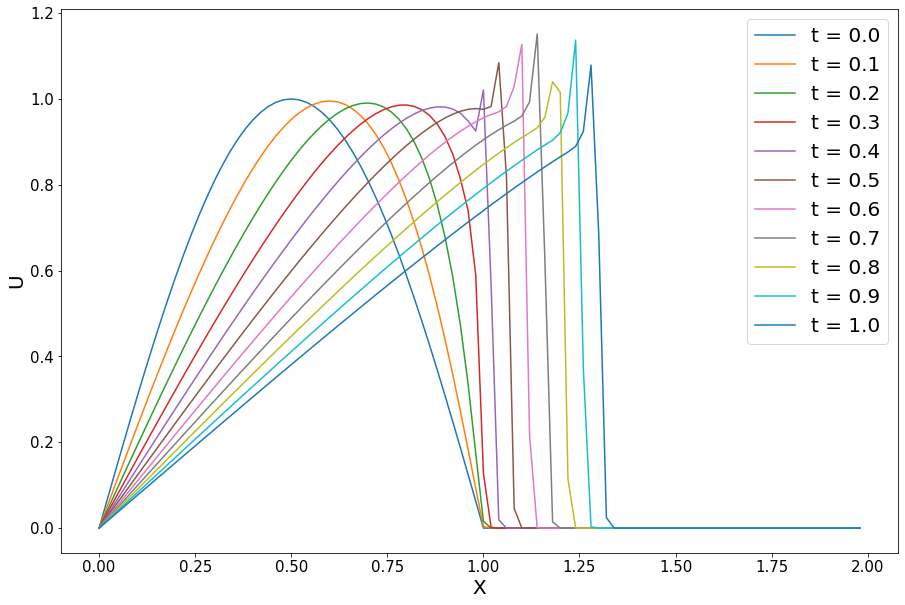

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(u):
  return u**2/2

def uu(up, um):
    return (um+up)/2

def p(up, uc, um, a):
  ul = uu(up, uc)
  ur = uu(uc, um)
  if (ur == ul):
    return 0
  else:
    return (f(ul) - f(ur))/(a*(ul - ur))

def fu(up, um, a):
  return uu(up, um)/a

a = 1
gamma = 0.5
h = 2/100
tau = gamma*h/a


XX = int(2/h)
TT = int(1/tau)+1
constT = TT//10
constX = XX//20

Y = np.zeros((TT, XX))
X = np.zeros(XX)
T = np.zeros(TT)

for i in range(0, TT):
  Y[i][0] = 0
  T[i] = i*tau
for i in range(0, XX):
  if ((i*h >= 0.0) and (i*h <= 1.0)):
    Y[0][i] = math.sin(i*h*math.pi)
  else: 
    Y[0][i] = 0
  X[i] = i*h

for i in range(0, TT-1):
  for j in range(1, XX-1):
    pp = p(Y[i][j+1], Y[i][j], Y[i][j-1], a)
    fu1 = fu(Y[i][j], Y[i][j-1], a)
    fu2 = fu(Y[i][j+1], Y[i][j], a)
    A = gamma * (gamma * fu1 **2 + 0.5 * pp)
    B = 1 - gamma**2 * fu2 **2 - gamma**2 * fu1 **2
    C = gamma * (gamma * fu2 **2 - 0.5*pp)
    Y[i+1][j] = A*Y[i][j-1] + B*Y[i][j] + C*Y[i][j+1]
  Y[i+1][0] = Y[i][0]   
  Y[i+1][XX-1] = Y[i][XX-1]

plt.figure(figsize = (15, 10))
for h in range(11):
  hh = h*constT
  t = round(hh*tau, 1)
  plt.plot(X, Y[hh, :], label='t = ' + repr(t))
plt.xlabel('X', fontsize=20)
plt.ylabel('U', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()



**Схема с искуственной вязкостью**

Теперь введем искуственную вязкость $\mu_0 = const: \frac{\mu_0}{ah} = 0,2$

$u_k^{n+1} = \gamma(\gamma p_{k-\frac{1}{2}}^2 + 0,5 p_k^n + \mu)u_{k-1}^n + (1 - \gamma^2 p_{k+\frac{1}{2}}^2 - \gamma^2 p_{k-\frac{1}{2}}^2 - \mu)u_k^n + \gamma(\gamma p_{k+\frac{1}{2}}^2 - 0,5 p_k^n + \mu)u_{k+1}^n$

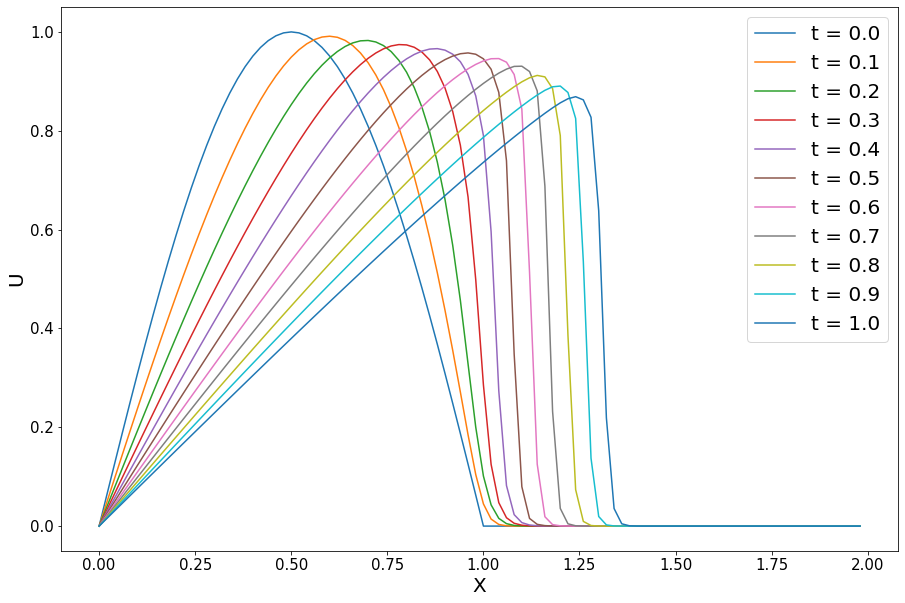

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(u):
  return u**2/2

def uu(up, um):
    return (um+up)/2

def p(up, uc, um, a):
  ul = uu(up, uc)
  ur = uu(uc, um)
  if (ur == ul):
    return 0
  else:
    return (f(ul) - f(ur))/(a*(ul - ur))

def fu(up, um, a):
  return uu(up, um)/a

a = 1
gamma = 0.5
h = 2/100
tau = gamma*h/a
mu = 0.2


XX = int(2/h)
TT = int(1/tau)+1
constT = TT//10
constX = XX//20

Y = np.zeros((TT, XX))
X = np.zeros(XX)
T = np.zeros(TT)

for i in range(0, TT):
  Y[i][0] = 0
  T[i] = i*tau
for i in range(0, XX):
  if ((i*h >= 0.0) and (i*h <= 1.0)):
    Y[0][i] = math.sin(i*h*math.pi)
  else: 
    Y[0][i] = 0
  X[i] = i*h

for i in range(0, TT-1):
  for j in range(1, XX-1):
    pp = p(Y[i][j+1], Y[i][j], Y[i][j-1], a)
    fu1 = fu(Y[i][j], Y[i][j-1], a)
    fu2 = fu(Y[i][j+1], Y[i][j], a)
    A = gamma * (gamma * fu1 **2 + 0.5 * pp + mu)
    B = 1 - gamma**2 * fu2 **2 - gamma**2 * fu1 **2 - mu
    C = gamma * (gamma * fu2 **2 - 0.5*pp + mu)
    Y[i+1][j] = A*Y[i][j-1] + B*Y[i][j] + C*Y[i][j+1]
  Y[i+1][0] = Y[i][0]   
  Y[i+1][XX-1] = Y[i][XX-1]

plt.figure(figsize = (15, 10))
for h in range(11):
  hh = h*constT
  t = round(hh*tau, 1)
  plt.plot(X, Y[hh, :], label='t = ' + repr(t))
plt.xlabel('X', fontsize=20)
plt.ylabel('U', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

